In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.1/8062.4 GB disk)


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AE4x6F2UzA8PofP1XkmV")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(12)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing install


Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-12 in yolov9:: 100%|██████████| 23784/23784 [00:03<00:00, 7492.99it/s] 


## Train Custom Model

In [3]:
# Build a YOLOv9c model from scratch and train it on the COCO8 example dataset for 100 epochs
!yolo train model=yolov9c.yaml data=/kaggle/input/datadata/data.yaml epochs=10 imgsz=640 batch=16

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/kaggle/input/datadata/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

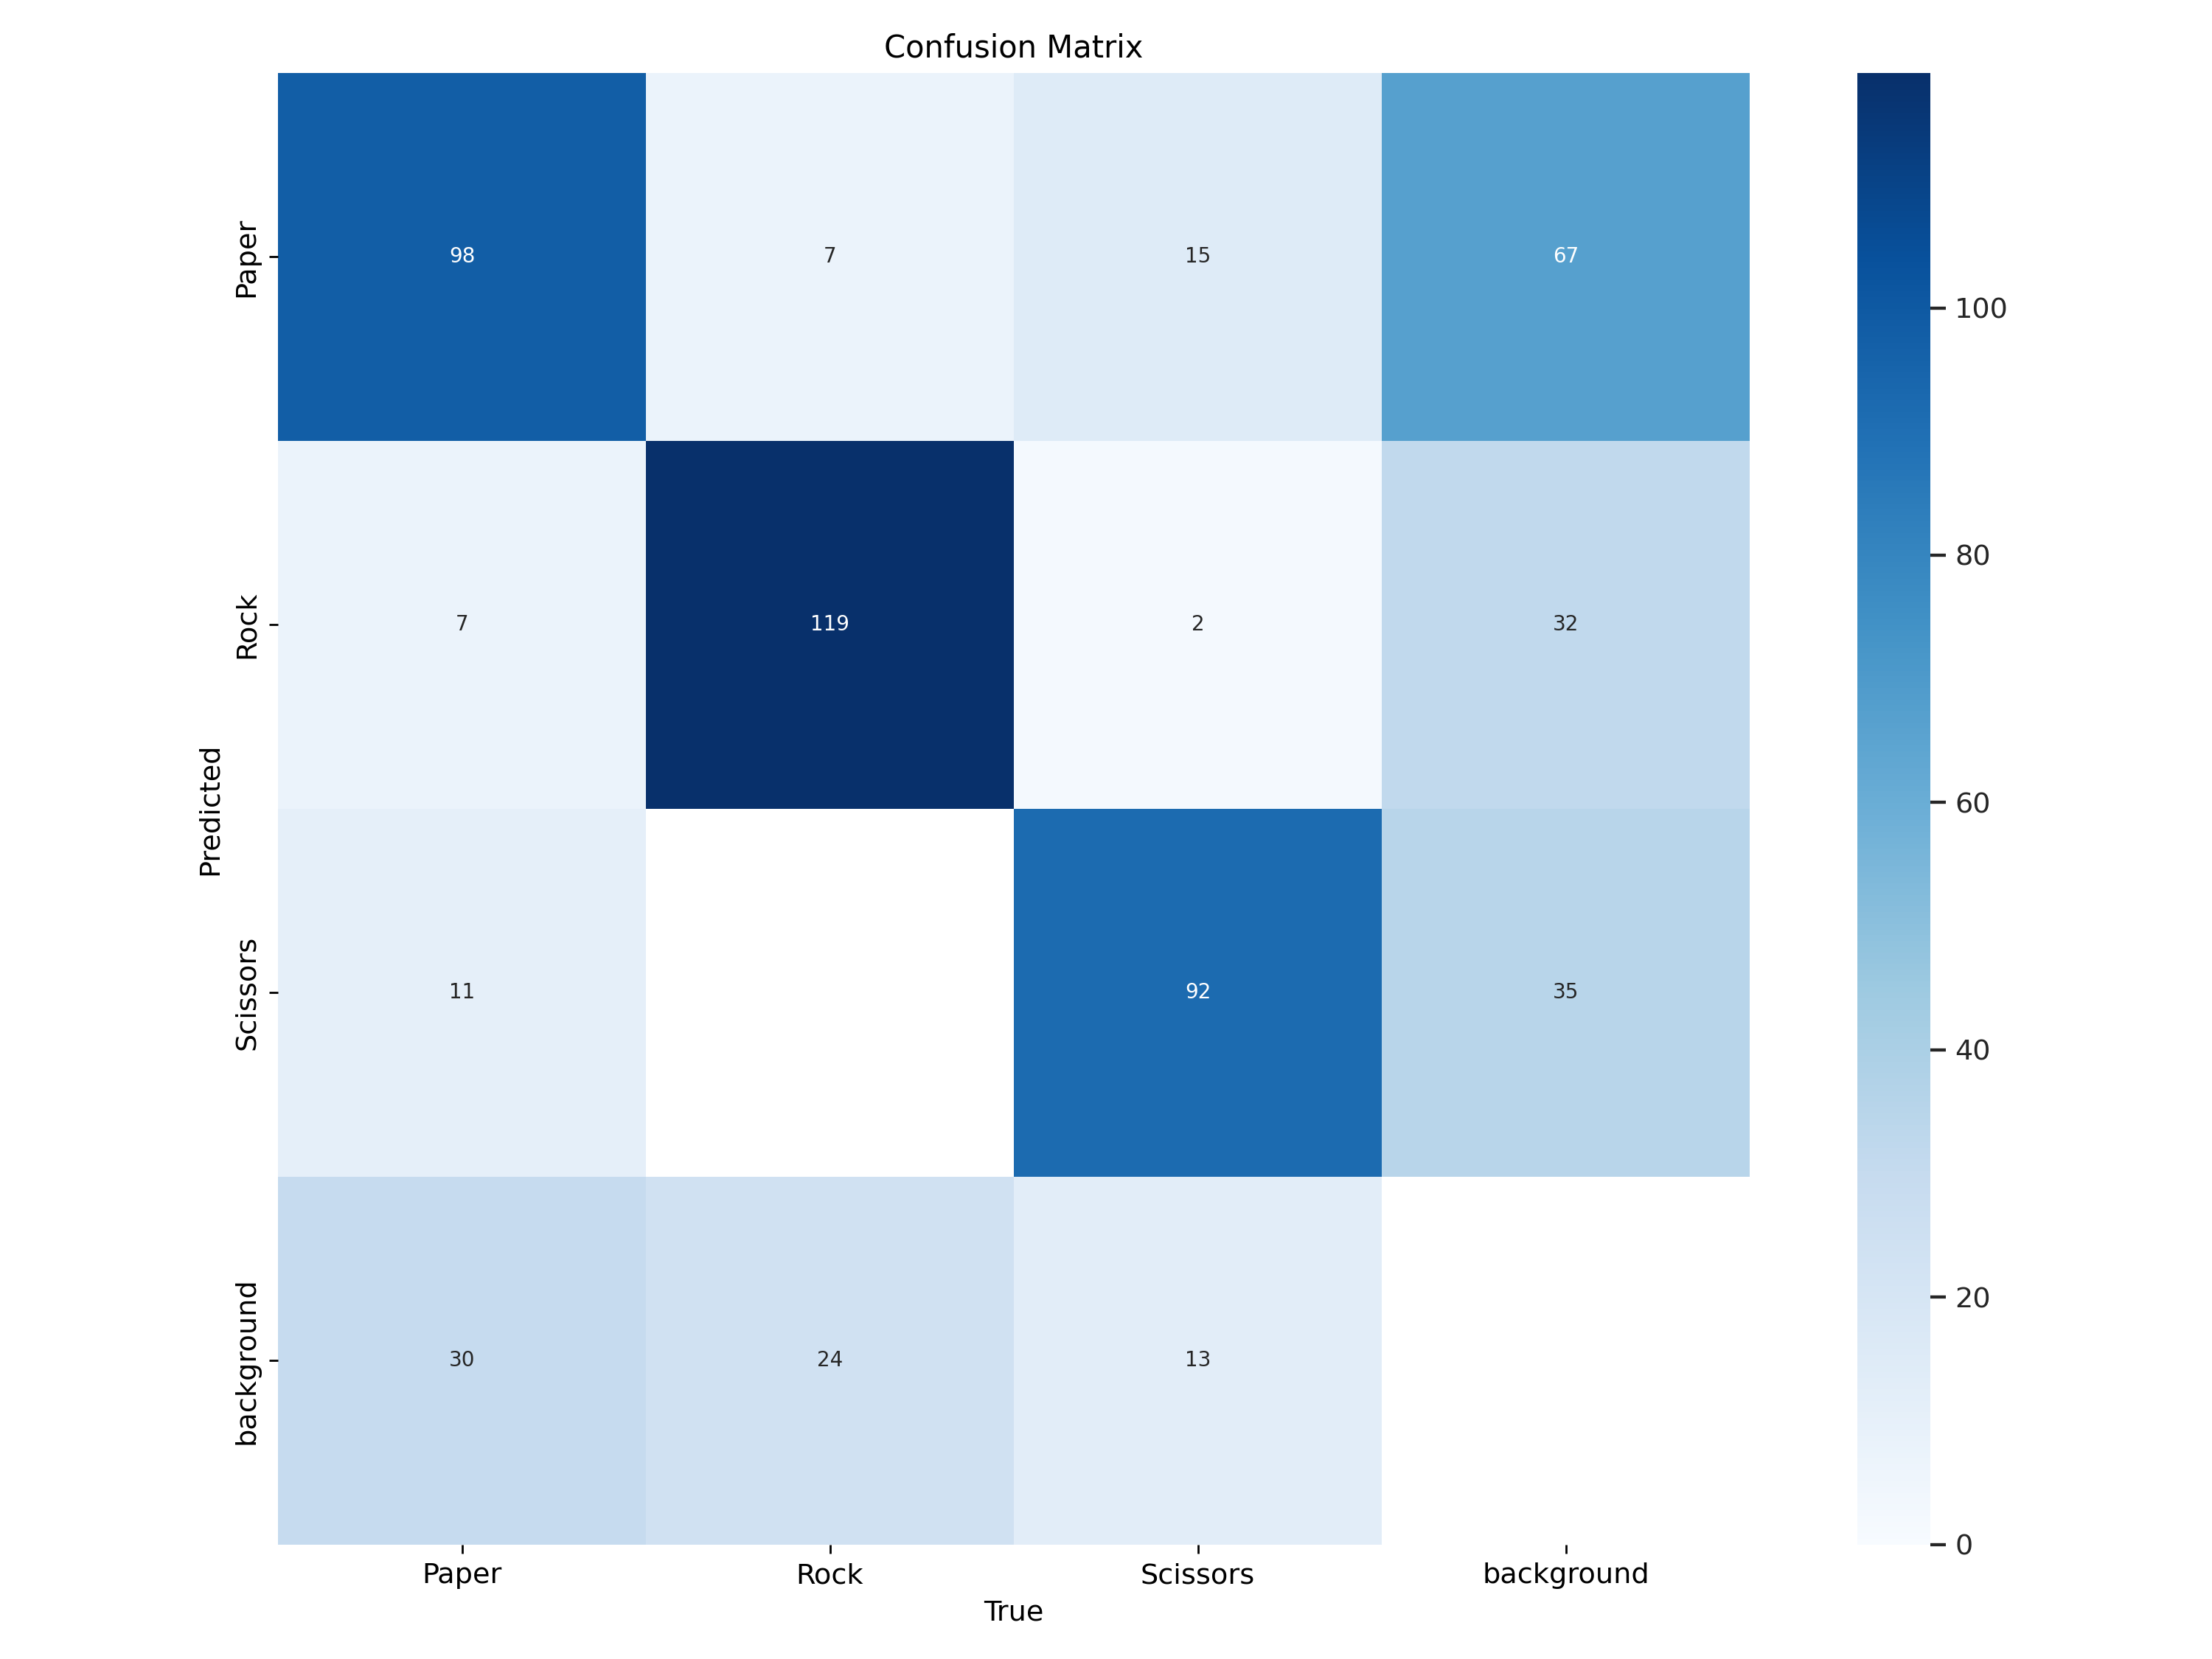

In [5]:
from IPython.display import Image, display
Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000)

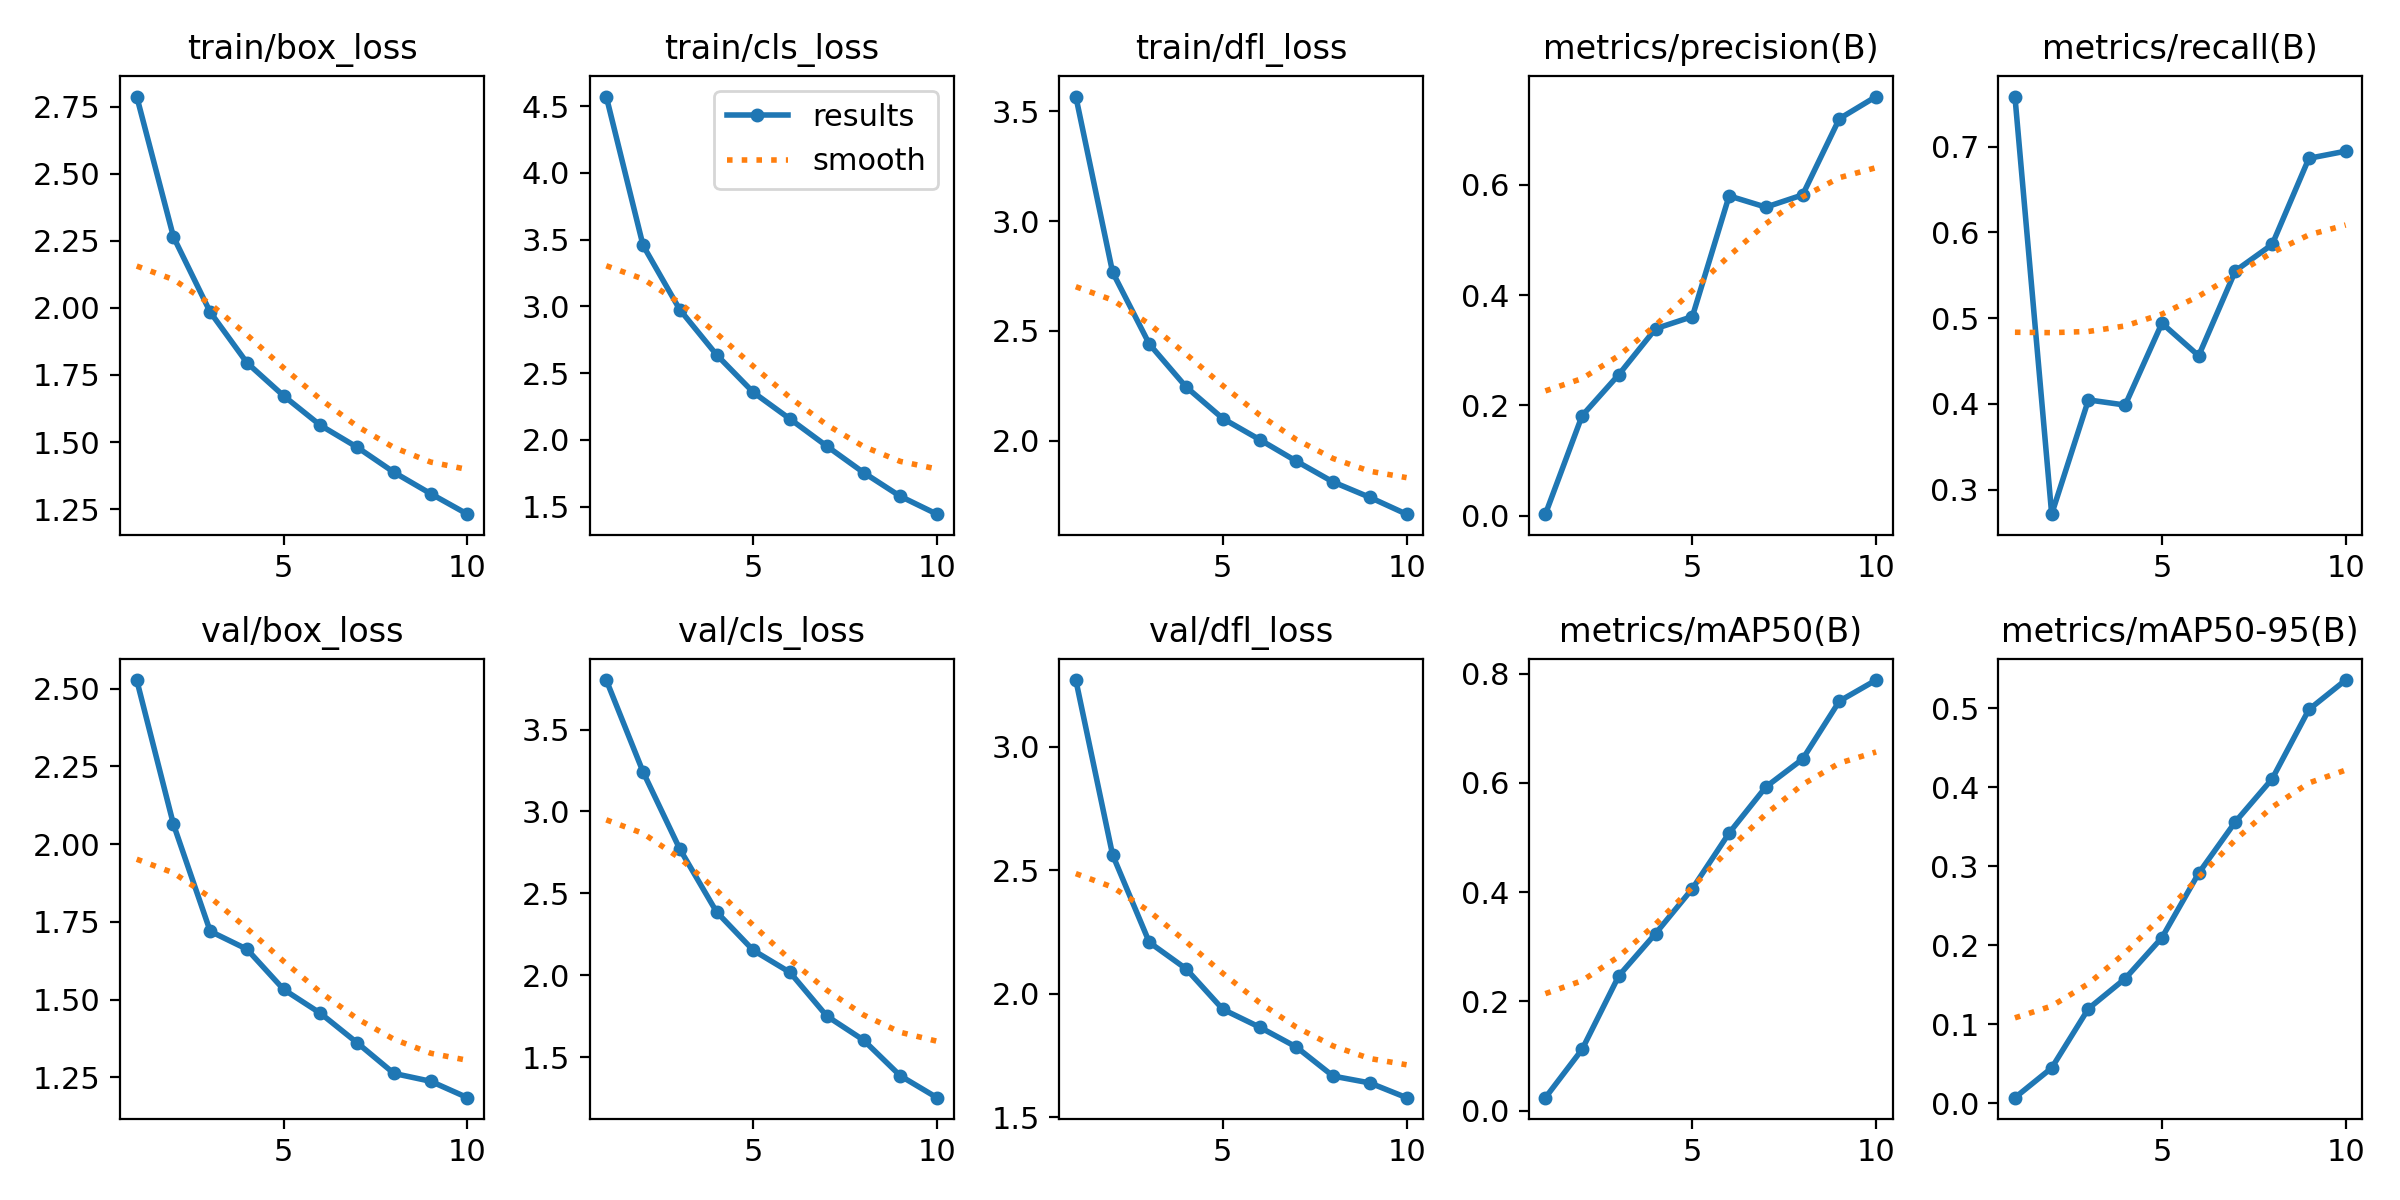

In [6]:
Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000)

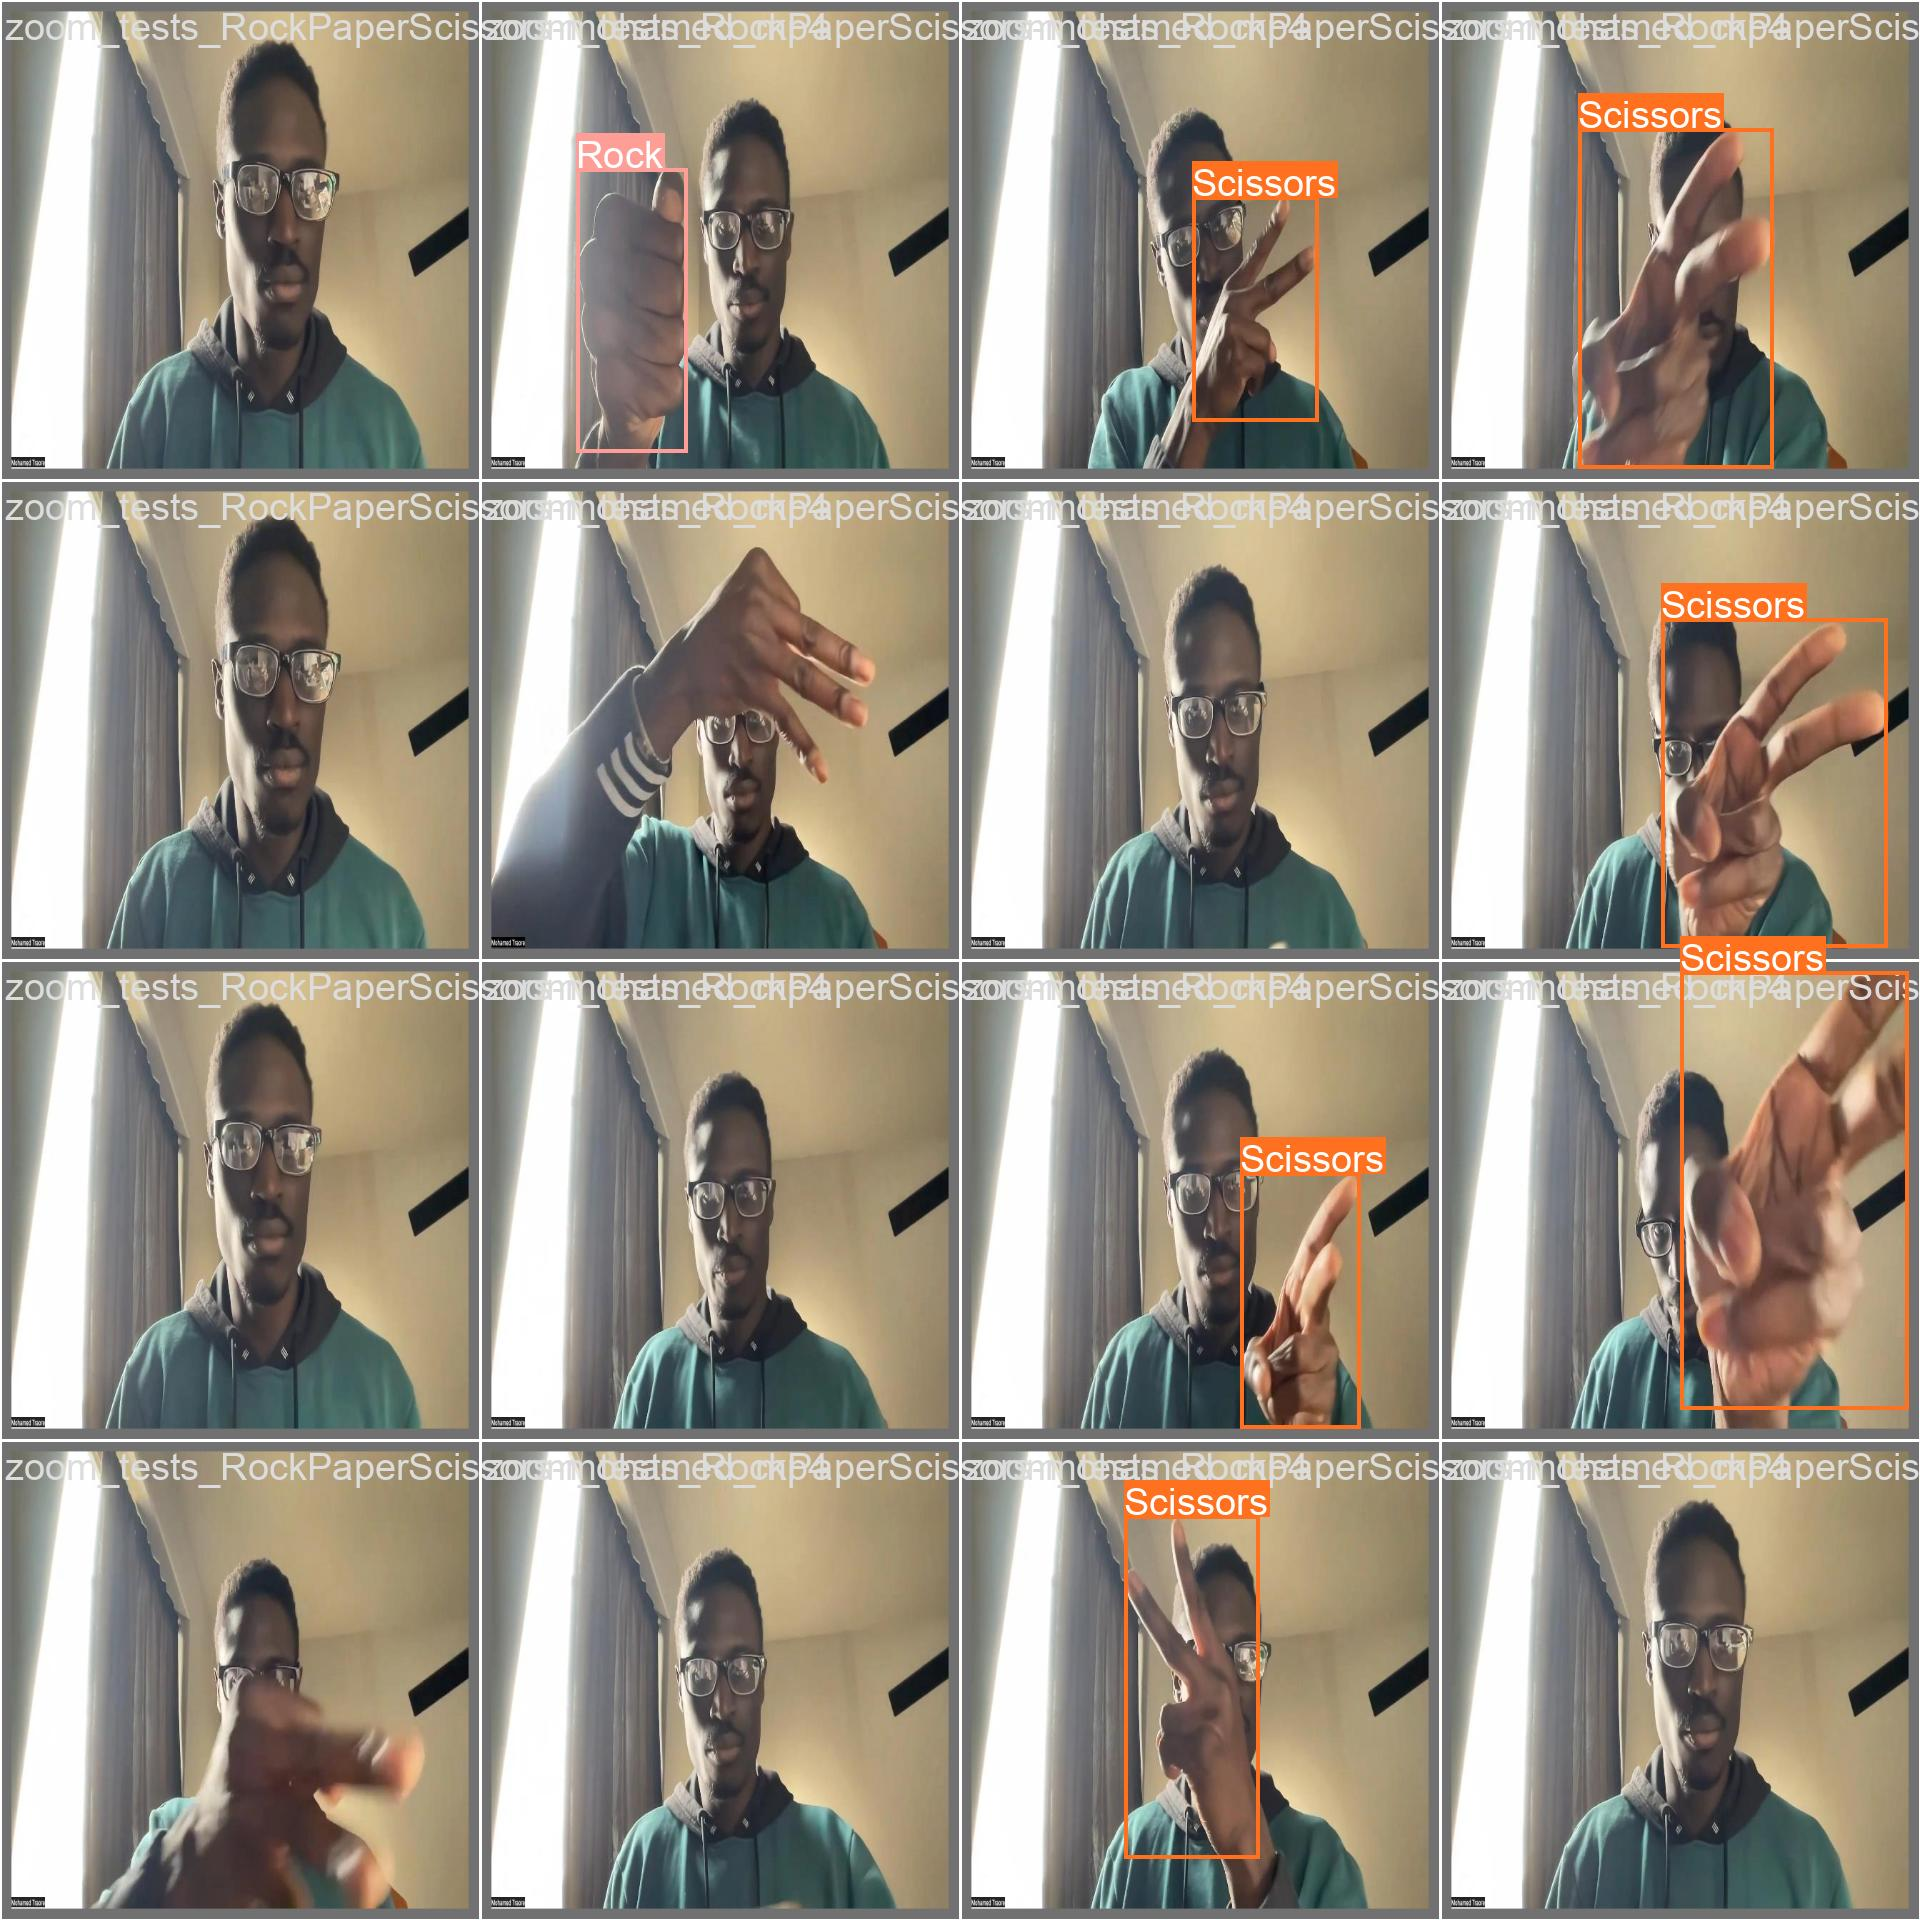

In [8]:
Image(filename=f"/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=1000)

## Inference with Custom Model

In [9]:
!yolo predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs

image 1/329 /kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 50.4ms
image 2/329 /kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 49.6ms
image 3/329 /kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 49.3ms
image 4/329 /kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 34.0ms
image 5/329 /kaggle/working/Rock-Paper-Scissors-SXSW-12/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Paper, 34.0ms
image 6/329 /kaggle/working/Rock-Paper-Sci

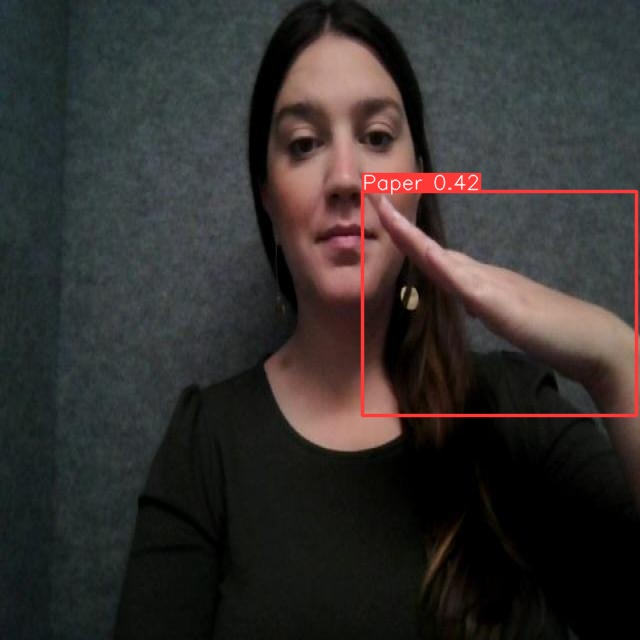

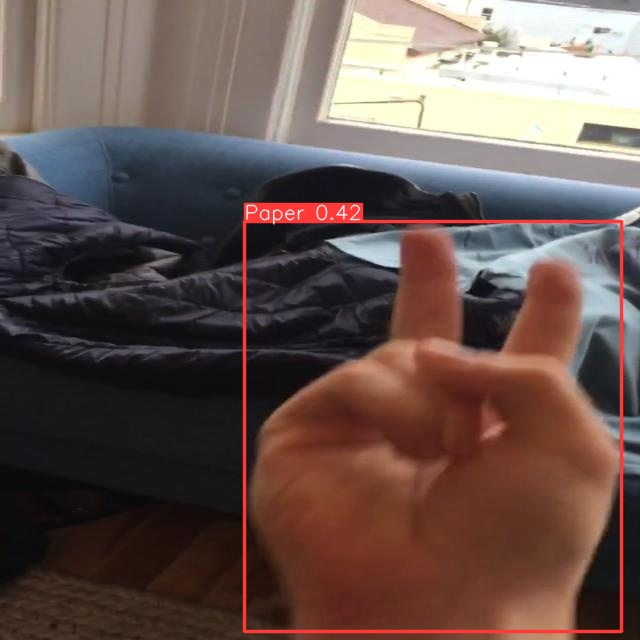

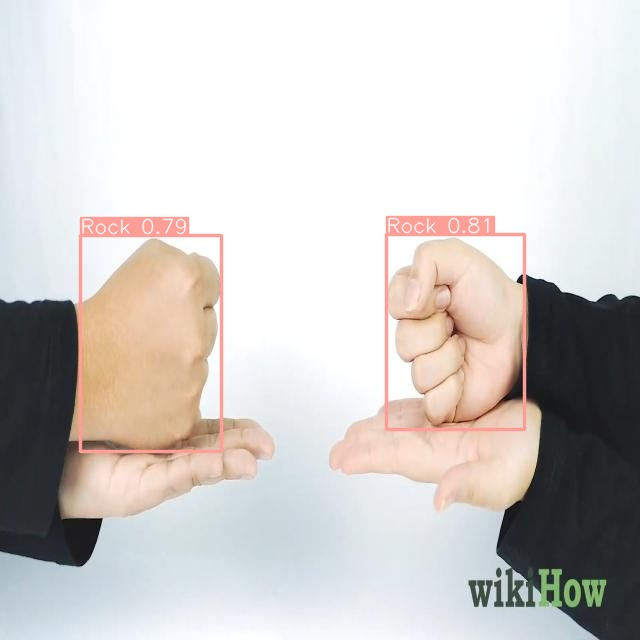

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")